# Exercise 3: Statistical Darts

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Task 1: Simulate Dart Throws

In [10]:
def simulate_data(mu_true, Sigma_true, n_samples):
    return np.random.multivariate_normal(mu_true, Sigma_true, n_samples)

# Task 2: Compute MLE

In [11]:
def compute_mle(data):
    return np.mean(data, axis=0)

# Task 3: Compute Posterior and MAP

In [13]:
def compute_posterior(data, prior, Sigma_true):
    mu_0, Sigma_0 = prior
    N = data.shape[0]
    Sigma_true_inv = np.linalg.inv(Sigma_true)
    Sigma_0_inv = np.linalg.inv(Sigma_0)

    Sigma_post = np.linalg.inv(Sigma_0_inv + N * Sigma_true_inv)
    mu_mle = compute_mle(data)
    mu_post = Sigma_post @ (Sigma_0_inv @ mu_0 + N * Sigma_true_inv @ mu_mle)
    return mu_post, Sigma_post

def compute_map(data, prior, Sigma_true):
    mu_post, _ = compute_posterior(data, prior, Sigma_true)
    return mu_post

# Task 4: Visulization

In [14]:
def plot_cov_ellipse(mean, cov, ax, n_std=2.0, facecolor='none', edgecolor='black', label=''):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(vals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta,
                      facecolor=facecolor, edgecolor=edgecolor, lw=2, label=label)
    ax.add_patch(ellipse)

def visualize_inference(mu_true, mu_mle, mu_map, mu_post, Sigma_post, data):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(data[:, 0], data[:, 1], color='gray', s=60, label='Throws', alpha=0.7)
    ax.scatter(*mu_true, color='green', marker='*', s=200, label='True aim (μ_true)')
    ax.scatter(*mu_mle, color='blue', marker='x', s=100, label='MLE')
    ax.scatter(*mu_map, color='red', marker='D', s=80, label='MAP')
    ax.scatter(*mu_post, color='orange', marker='o', s=100, label='Posterior mean (μ_post)')
    plot_cov_ellipse(mu_post, Sigma_post, ax, n_std=2, edgecolor='orange', label='Posterior 95% CI')
    ax.set_title("Dart Throw Inference Visualization", fontsize=14)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.legend()
    ax.set_aspect('equal')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    plt.show()

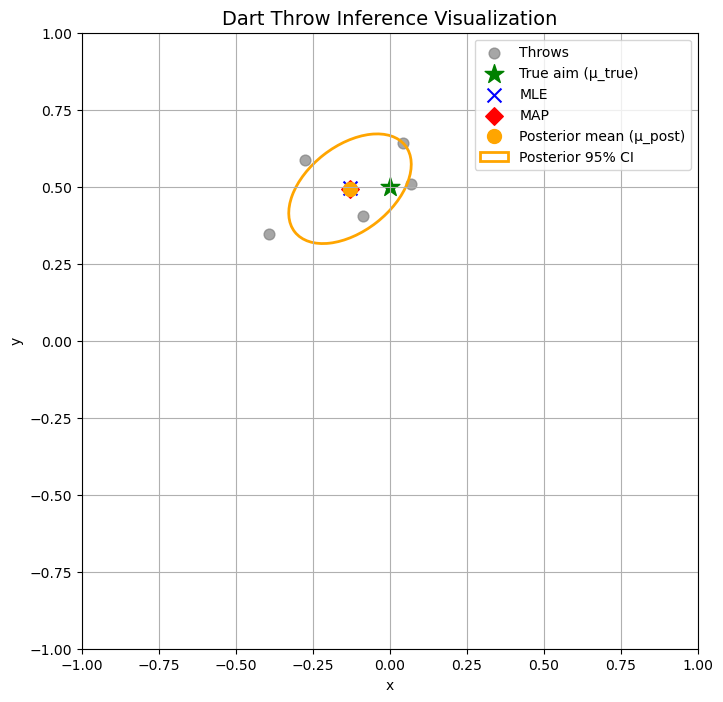

In [18]:
if __name__ == "__main__":
    np.random.seed(42)

    # True parameters
    mu_true = np.array([0.0, 0.5])
    Sigma_true = np.array([[0.05, 0.02],
                           [0.02, 0.04]])

    # Prior (standard normal around bullseye)
    mu_0 = np.array([0.0, 0.0])
    Sigma_0 = np.eye(2)
    prior = (mu_0, Sigma_0)

    # Simulate data
    N = 5  # number of throws
    data = simulate_data(mu_true, Sigma_true, N)

    # Perform inference
    mu_mle = compute_mle(data)
    mu_post, Sigma_post = compute_posterior(data, prior, Sigma_true)
    mu_map = compute_map(data, prior, Sigma_true)

    # Visualize results
    visualize_inference(mu_true, mu_mle, mu_map, mu_post, Sigma_post, data)
